In [8]:
df = pd.read_csv("train.csv", parse_dates=['Dates'])
# 연,월,주차,시간(1시간단위)
df['year'] = df['Dates'].map(lambda x: x.year)
df['month'] = df['Dates'].map(lambda x: x.month)
df['week'] = df['Dates'].map(lambda x: x.week)
df['hour'] = df['Dates'].map(lambda x: x.hour)
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,week,hour
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,2,0
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,2,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,2,0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,2,0
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212,2003,1,2,0


In [5]:
submission = pd.read_csv("sampleSubmission.csv")
submission.tail()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
884257,884257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884258,884258,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884259,884259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884260,884260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884261,884261,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##### 1. Dates (사건일자)
: timestamp of the crime incident
##### 2. Category (범죄유형 - 종속변수)
: category of the crime incident (only in train.csv). This is the target variable you are going to predict.
##### 3. Descript (범죄 세부정보)
: detailed description of the crime incident (only in train.csv)
##### 4. DayOfWeek (요일)
: the day of the week
##### 5. PdDistrict (관할서)
: name of the Police Department District
##### 6. Resolution (처벌결과)
: how the crime incident was resolved (only in train.csv)
##### 7. Address (사건현장 대략적 주소)
: the approximate street address of the crime incident 
##### 8. X (경도)
:Longitude
##### 9. Y (위도)
: Latitude

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 13 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
year          878049 non-null int64
month         878049 non-null int64
week          878049 non-null int64
hour          878049 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 87.1+ MB


null값 1도 없음.

In [10]:
for i in df.columns:
    print(i, "\n", df[i].unique(), len(df[i].unique()))

Dates 
 ['2015-05-13T23:53:00.000000000' '2015-05-13T23:33:00.000000000'
 '2015-05-13T23:30:00.000000000' ..., '2003-01-06T00:20:00.000000000'
 '2003-01-06T00:15:00.000000000' '2003-01-06T00:01:00.000000000'] 389257
Category 
 ['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT'] 39
Descript 
 ['WARRANT ARREST' 'TRAFFIC VIOLATION ARREST' 'GRAND THEFT FROM LOCKED AUTO'
 'GRAND THEFT FROM UNLOCKED AUTO' 'STOLEN AUTOMOBILE'
 'PETTY THEFT FROM LOCKED 

PdDistrict 
 ['NORTHERN' 'PARK' 'INGLESIDE' 'BAYVIEW' 'RICHMOND' 'CENTRAL' 'TARAVAL'
 'TENDERLOIN' 'MISSION' 'SOUTHERN'] 10
Resolution 
 ['ARREST, BOOKED' 'NONE' 'ARREST, CITED' 'PSYCHOPATHIC CASE'
 'JUVENILE BOOKED' 'UNFOUNDED' 'EXCEPTIONAL CLEARANCE' 'LOCATED'
 'CLEARED-CONTACT JUVENILE FOR MORE INFO' 'NOT PROSECUTED'
 'JUVENILE DIVERTED' 'COMPLAINANT REFUSES TO PROSECUTE'
 'JUVENILE ADMONISHED' 'JUVENILE CITED'
 'DISTRICT ATTORNEY REFUSES TO PROSECUTE' 'PROSECUTED BY OUTSIDE AGENCY'
 'PROSECUTED FOR LESSER OFFENSE'] 17
Address 
 ['OAK ST / LAGUNA ST' 'VANNESS AV / GREENWICH ST'
 '1500 Block of LOMBARD ST' ..., '300 Block of JOHN F KENNEDY DR'
 'FOLSOM ST / ZENO PL' '1000 Block of 22ND AV'] 23228
X 
 [-122.42589168 -122.42436302 -122.42699533 ..., -122.48124622 -122.41850208
 -122.39492572] 34243
Y 
 [ 37.7745986   37.80041432  37.80087263 ...,  37.77644744  37.73394539
  37.73821154] 34243
year 
 [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003] 13
month 
 [ 5  4  3

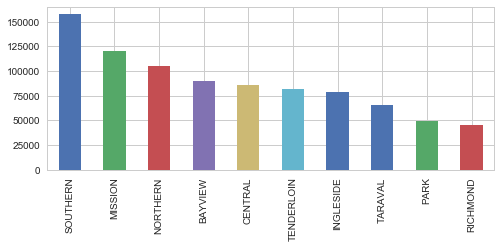

In [20]:
df.PdDistrict.value_counts().plot(kind='bar', figsize=(8,3))

In [23]:
df['event'] = 1
weekly_events = df[['week','year','event']].groupby(['year','week']).count().reset_index()
weekly_events

,year,week,event
0,2003,2,2849
1,2003,4,2982
2,2003,6,2994
3,2003,8,2970
4,2003,10,2967
5,2003,12,2747
6,2003,14,3036
7,2003,16,2877
8,2003,18,2856
9,2003,20,2989


In [37]:
weekly_events_years = weekly_events.pivot(index='week', columns='year', values='event').fillna(method='ffill')
weekly_events_years

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
week,,,,,,,,,,,,,
2,2849.0,2841.0,2934.0,2682.0,2628.0,2709.0,2692.0,2692.0,2664.0,2711.0,2743.0,2820.0,2892.0
4,2982.0,3097.0,2735.0,2593.0,2466.0,2473.0,2580.0,2487.0,2511.0,2746.0,2969.0,2960.0,2974.0
6,2994.0,2889.0,2634.0,2791.0,2656.0,2668.0,2529.0,2640.0,2549.0,2694.0,2808.0,2779.0,2933.0
8,2970.0,2737.0,2618.0,2746.0,2437.0,2616.0,2708.0,2423.0,2480.0,2673.0,2886.0,2880.0,3075.0
10,2967.0,3134.0,2737.0,2630.0,2660.0,2935.0,2824.0,2513.0,2575.0,2650.0,2829.0,2942.0,3078.0
12,2747.0,2886.0,2711.0,2788.0,2549.0,2701.0,2919.0,2484.0,2496.0,2691.0,3001.0,2946.0,2962.0
14,3036.0,3097.0,2811.0,2772.0,2357.0,2600.0,2994.0,2415.0,2608.0,2531.0,2850.0,2852.0,2874.0
16,2877.0,2958.0,2775.0,2752.0,2660.0,2696.0,2754.0,2475.0,2515.0,2685.0,2967.0,2872.0,2930.0
18,2856.0,3039.0,2771.0,2414.0,2592.0,2811.0,2651.0,2690.0,2474.0,2791.0,2922.0,2786.0,2748.0


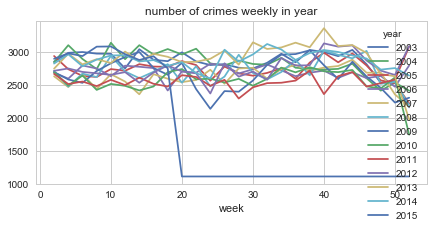

In [59]:
weekly_events_years.plot(title='number of crimes weekly in year', figsize=(7,3))

In [47]:
events_hour = df[['hour','event']].groupby('hour').count().reset_index()
events_hour

,hour,event
0,0,44865
1,1,26173
2,2,22296
3,3,14014
4,4,9863
5,5,8637
6,6,13133
7,7,22048
8,8,32900
9,9,35555


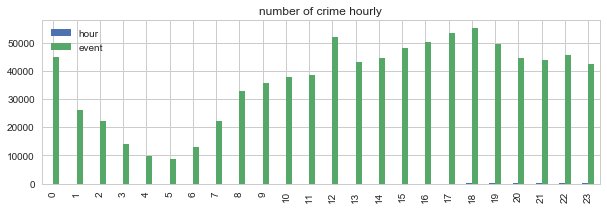

In [56]:
events_hour.plot(kind='bar', title='number of crime hourly', figsize=(10,3))

In [51]:
hourly_district_events = df[['PdDistrict','hour','event']].groupby(['PdDistrict','hour']).count().reset_index()
hourly_district_events

,PdDistrict,hour,event
0,BAYVIEW,0,4041
1,BAYVIEW,1,2092
2,BAYVIEW,2,1714
3,BAYVIEW,3,1196
4,BAYVIEW,4,928
5,BAYVIEW,5,976
6,BAYVIEW,6,1301
7,BAYVIEW,7,2701
8,BAYVIEW,8,3954
9,BAYVIEW,9,3970


In [52]:
hourly_district_events_pivot = hourly_district_events.pivot(index='hour', columns='PdDistrict', values='event')
hourly_district_events_pivot

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
hour,,,,,,,,,,
0,4041,4983,4256,6659,5639,2119,2507,7977,3459,3225
1,2092,3509,1944,4403,3703,1246,1249,4532,1551,1944
2,1714,2806,1814,3627,3192,1011,1107,3796,1451,1778
3,1196,1506,1200,2114,2148,697,666,2236,1006,1245
4,928,1081,870,1447,1397,591,443,1591,645,870
5,976,854,777,1128,1295,438,396,1322,512,939
6,1301,1083,1087,1893,1546,629,594,2194,855,1951
7,2701,1649,2041,3043,2443,1362,1056,3598,1798,2357
8,3954,2664,3136,4194,3679,2100,1808,5678,2754,2933


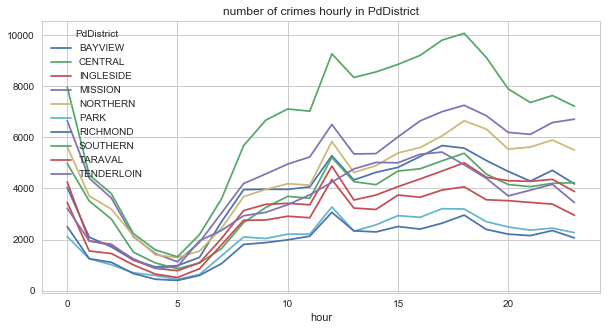

In [54]:
hourly_district_events_pivot.plot(title="number of crimes hourly in PdDistrict", figsize=(10,5))